In [ ]:
!pip install nltk scikit-learn seaborn


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from google.colab import files
uploaded = files.upload()

# Load the dataset
df = pd.read_csv('amazon.csv')  # Ensure 'amazon.csv' is the correct file name


Saving amazon.csv to amazon.csv


In [ ]:
# Check the first few rows of the dataset
df.head()


,Text,label
0,This is the best apps acording to a bunch of ...,1
1,This is a pretty good version of the game for ...,1
2,this is a really . there are a bunch of levels...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


In [ ]:
# Download necessary NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import nltk
nltk.download('punkt')  # Ensure the correct 'punkt' resource is downloaded


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.data.path.append('/usr/share/nltk_data')  # Add the resource path
nltk.download('punkt', download_dir='/usr/share/nltk_data')  # Force download to this directory


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk

# Add the resource path to NLTK
nltk.data.path.append('/usr/share/nltk_data')  # Ensure nltk looks in the correct directory

# Download the punkt resource and punkt_tab resource
nltk.download('punkt', download_dir='/usr/share/nltk_data')  # Force download to the specified path
nltk.download('punkt_tab', download_dir='/usr/share/nltk_data')  # Ensure punkt_tab is also downloaded


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Data Preprocessing Functions

# Clean the text data
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove non-alphanumeric characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    stop_words = set(stopwords.words('english'))  # Stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Lemmatize words
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    tokens = word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(word) for word in tokens])

# Apply the cleaning and lemmatization functions
# Apply the cleaning and lemmatization functions
df['cleaned_reviews'] = df['Text'].apply(clean_text)  # Use 'Text' as the column name
df['lemmatized_reviews'] = df['cleaned_reviews'].apply(lemmatize_words)


In [ ]:
# Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['lemmatized_reviews']).toarray()


In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=42)


In [ ]:
# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Predict the sentiment of the test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Adjust for multiclass if needed
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.88475
Precision: 0.8907537381751602
Recall: 0.9659166115155526
F1 Score: 0.9268137799650739


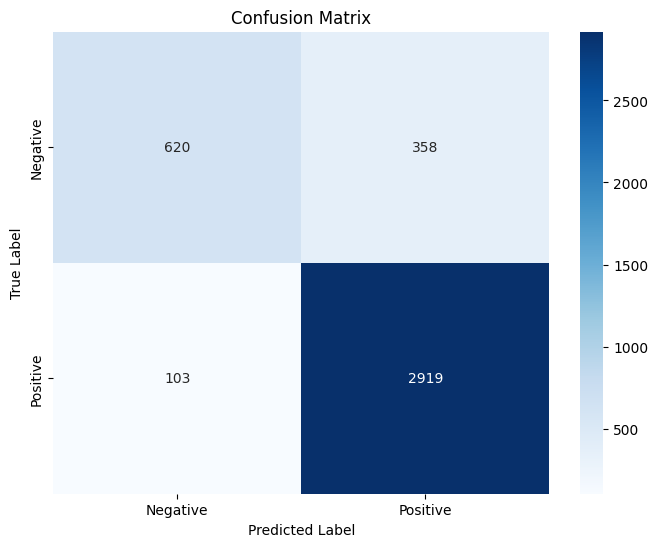

In [ ]:
# Generate and visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import joblib

# Save the model
joblib.dump(model, 'sentiment_model.pkl')

# Save the vectorizer
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']

In [ ]:
def predict_sentiment(text):
    cleaned_text = clean_text(text)
    lemmatized_text = lemmatize_words(cleaned_text)
    vectorized_text = vectorizer.transform([lemmatized_text]).toarray()
    return model.predict(vectorized_text)

# Test with a new review
new_review = "This product is amazing! Highly recommend it."
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment[0]}")


The sentiment of the review is: 1


In [ ]:
import joblib

# Save the trained model
joblib.dump(model, 'sentiment_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']

In [ ]:
!zip sentiment_analysis_files384.zip sentiment_model.pkl vectorizer.pkl


  adding: sentiment_model.pkl (deflated 5%)
  adding: vectorizer.pkl (deflated 72%)


In [ ]:
!ls


amazon.csv   sentiment_analysis_files384.zip  sentiment_model.pkl
sample_data  sentiment_analysis_files.zip     vectorizer.pkl


In [ ]:
from google.colab import files
files.download('sentiment_analysis_files384.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>